In [176]:
import pandas as pd
import json

### Carga de plans

In [177]:
# Ruta al archivo plans.jsonlines
plans_file_path = 'plans.jsonlines'

# Cargar el archivo .jsonlines directamente en un DataFrame
plans_df = pd.read_json(plans_file_path, lines=True)

# Mostrar las primeras filas del DataFrame
plans_df


,items,simulationId,trucks
0,"[{'itemId': '0', 'locationId': '326ae8dc7810de...",a2bfd344-3b14-462a-82e7-d42aca54a650,"[{'items': ['23', '24', '4', '25', '26', '27',..."
1,"[{'itemId': '0', 'locationId': '271c4e156a04e8...",a8a11526-6b9b-4143-bfb1-ffcae600a17e,"[{'items': ['62', '63', '69', '70', '71', '21'..."
2,"[{'itemId': '0', 'locationId': '6aa95e84c67637...",2f956e3a-25df-4c5e-bb50-92d92dc9ba00,"[{'items': ['79', '20', '21', '5', '76', '59',..."
3,"[{'itemId': '0', 'locationId': '0078f3bf6db092...",45c9a42a-7cb5-4266-b0aa-a05b3f446390,"[{'items': ['3', '4', '5', '6', '72', '11', '1..."
4,"[{'itemId': '0', 'locationId': '92e059821c9ca8...",864bd9f3-074d-45e8-a032-5a01237ae290,"[{'items': ['77', '78', '79', '16', '17', '91'..."
...,...,...,...
94,"[{'itemId': '0', 'locationId': '281ec8ac82cccd...",81acb266-ab82-497b-92d9-fae490cc4823,"[{'items': ['36', '37', '49', '6', '7', '8', '..."
95,"[{'itemId': '0', 'locationId': '950001b613cb58...",f007019f-866d-48be-a0cb-bd96328ee43b,"[{'items': ['46', '47', '48', '49', '40', '24'..."
96,"[{'itemId': '0', 'locationId': 'b40599012e4fba...",f0f90050-5a0f-4965-864e-d6bc0d02b5a0,"[{'items': ['16', '17', '42', '43', '44', '45'..."
97,"[{'itemId': '0', 'locationId': '074dc13529fd8b...",e33505ca-bfdb-496f-bcfd-b8b913a42637,"[{'items': ['62', '63', '64', '86', '10', '11'..."


### Carga de positions

In [178]:
# Ruta al archivo position.jsonlines
events_file_path = 'simulation.jsonlines'

# Cargar el archivo .jsonlines directamente en un DataFrame
events_df = pd.read_json(events_file_path, lines=True)

# Mostrar las primeras filas del DataFrame
events_df

,eventDescription,eventTime,eventType,simulationId,truckId
0,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5760,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,1669HSZ
1,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5730,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,8809GPH
2,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5730,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,1161GJN
3,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5430,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,3321FBL
4,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",5310,Truck departed,a2bfd344-3b14-462a-82e7-d42aca54a650,2423VRT
...,...,...,...,...,...
26577,"(calle de Juan de Austria, 1, Madrid, [-3.6991...",11562780,Truck arrived,f0f90050-5a0f-4965-864e-d6bc0d02b5a0,8386WZB
26578,"Packet 83 to (calle de Juan de Austria, 1, Mad...",11623380,Truck ended delivering,f0f90050-5a0f-4965-864e-d6bc0d02b5a0,8386WZB
26579,"(plaza del Dos de Mayo, 6, Madrid, [-3.7041862...",11623470,Truck departed to depot,f0f90050-5a0f-4965-864e-d6bc0d02b5a0,8386WZB
26580,,11813550,Truck ended route,f0f90050-5a0f-4965-864e-d6bc0d02b5a0,8386WZB


### 1. Preguntas y exploración general

- ¿Cuántas filas y columnas tiene cada dataset? Hecho
- ¿Cuántas simulaciones se han realizado? ¿Cuántos eventos se han producido en total? ¿Cuántos planes se han ejecutado?
- ¿Cuántos eventos se han producido por tipo?
- ¿Cómo se representan los tiempos en los datos?
- ¿Cuánto tiempo se tarda en entregar un paquete?

In [179]:
# - ¿Cuántas filas y columnas tiene cada dataset? 
print('PLANS\n Columnas: ', plans_df.shape[1], ' Filas: ', plans_df.shape[0])
print('EVENTOS\n Columnas: ', events_df.shape[1], ' Filas: ', events_df.shape[0])

PLANS
 Columnas:  3  Filas:  99
EVENTOS
 Columnas:  5  Filas:  26582


In [180]:
plans_df.columns

Index(['items', 'simulationId', 'trucks'], dtype='object')

In [181]:
events_df.columns

Index(['eventDescription', 'eventTime', 'eventType', 'simulationId',
       'truckId'],
      dtype='object')

In [182]:
# - ¿Cuántas simulaciones se han realizado? ¿Cuántos eventos se han producido en total? ¿Cuántos planes se han ejecutado?
# 1. Número de simulaciones únicas
num_simulaciones_unicas = plans_df['simulationId'].nunique()
print('Numero de simulaciones unicas:', num_simulaciones_unicas)

# 2. Número total de eventos
num_eventos_total = events_df.shape[0]
print('Número total de eventos:', num_eventos_total)

# 3. Número de planes ejecutados
num_planes_ejecutados = plans_df.shape[0]
print('Número de planes ejecutados:', num_planes_ejecutados)


Numero de simulaciones unicas: 99
Número total de eventos: 26582
Número de planes ejecutados: 99


In [183]:
# - ¿Cuántos eventos se han producido por tipo?

# Número de eventos por tipo
eventos_por_tipo = events_df['eventType'].value_counts()
print('Eventos por tipo:', eventos_por_tipo)


Eventos por tipo: eventType
Truck started delivering    8567
Truck ended delivering      8567
Truck departed              3444
Truck arrived               3444
Truck initialized            640
Truck received packets       640
Truck departed to depot      640
Truck ended route            640
Name: count, dtype: int64


### -  EVENTOS

Nos centraremos en este df primero que es más simple y sin estructuras de datos complejas

In [184]:
# - ¿Cómo se representan los tiempos en los datos?

print('Los datos se representan en entero, como se muestra a continuación: ')
events_df.eventTime[0:5]

Los datos se representan en entero, como se muestra a continuación: 


0    5760
1    5730
2    5730
3    5430
4    5310
Name: eventTime, dtype: int64

In [185]:
# - ¿Cuánto tiempo se tarda en entregar un paquete?
entregas = events_df[events_df.eventType.isin(['Truck ended delivering', 'Truck started delivering'])]
entregas = entregas.sort_values(by=['simulationId', 'truckId', 'eventTime', 'eventType'])
#simulationId me sirve para saber que pasa el mismo dia
#truckId para saber que es el mismo camion
#eventTime para localizarlos por tiempo
#eventType para evitar que sean simultaneos

entregas['delta'] = entregas.eventTime.diff(1)
entregas = entregas[entregas.eventType == 'Truck ended delivering']
entregas.delta.describe

<bound method NDFrame.describe of 13021    120630.0
13112    120570.0
13566     60600.0
13614     60600.0
13666     60600.0
           ...   
11113     60600.0
11176     60570.0
11655     60600.0
11729     60600.0
11786     60600.0
Name: delta, Length: 8567, dtype: float64>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='delta', ylabel='Count'>

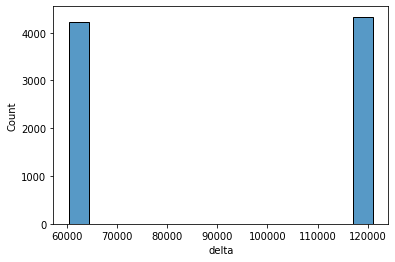

In [186]:
import seaborn as sns
sns.histplot(entregas.delta)
# todos los tiempos de entregas son 1 min o 2 min 

### 2. Transformación de los datos

In [187]:
# Con planes: 

primer_nivel=plans_df[['simulationId']].join(plans_df.trucks.explode().apply(pd.Series)).reset_index(drop=True) # genera una nueva columna por cada elemento
# problema: perdimos informacion de simulacion con la que está relacionada -> soluciono con join 

In [188]:
segundo_nivel=primer_nivel.join(primer_nivel.route.explode().apply(pd.Series)).reset_index(drop=True)
segundo_nivel

,simulationId,items,route,truck_id,destination,duration,origin
0,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,af3ea5c0e98151a51bd39c64,197,ce6feed06bc1a9e5aff95f04
1,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,c0430d1e19c34a06e343a270,733,af3ea5c0e98151a51bd39c64
2,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,b31f6bb5c55435cb5495a62b,380,c0430d1e19c34a06e343a270
3,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,58a50ddf91095c052e330fd6,612,b31f6bb5c55435cb5495a62b
4,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,910cd4ad38bc68ff7abdd941,850,58a50ddf91095c052e330fd6
...,...,...,...,...,...,...,...
4079,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,5bec37aee4796cc965e71c88,1173,20ee036e147b4a1bd5af0e1c
4080,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,1f183bd64aa5bfae47843de5,1198,5bec37aee4796cc965e71c88
4081,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,4551fdc303a5ddafa1dcf28c,1133,1f183bd64aa5bfae47843de5
4082,6deec7b7-6c11-418c-a1bd-f99a9e3261b6,"[79, 80, 81, 82, 24, 25, 40, 41, 42, 12, 23, 9...","[{'destination': '17c23e21622baec6f08861dd', '...",6270NFM,2884f6b369dc20f3051a216d,804,4551fdc303a5ddafa1dcf28c


In [189]:
events_df.eventType.unique() # los relacionados con los viajes son todos menos los de las entregas y de inicializacion, es decir
#departed, receive
#Init->departed->arrive ... si quedan mas paquetes <-- vuelvo a departed
#                       ... si no: -> departed to depot -> end

array(['Truck departed', 'Truck initialized', 'Truck received packets',
       'Truck arrived', 'Truck started delivering',
       'Truck ended delivering', 'Truck departed to depot',
       'Truck ended route'], dtype=object)

In [190]:
# Tiempo de viajes

viajes = events_df[events_df.eventType.isin([
       'Truck departed',
       'Truck arrived', 
       'Truck departed to depot',
       'Truck ended route'])].sort_values(by=['simulationId', 'truckId', 'eventTime'])

#simulationId me sirve para saber que pasa el mismo dia
#truckId para saber que es el mismo camion
#eventTime para localizarlos por tiempo
#eventType no hace falta aqui

viajes['delta'] = viajes.eventTime.diff(1) #diff(1) ->
viajes = viajes[viajes.eventType.isin(['Truck ended route','Truck arrived'])].reset_index(drop=True)
viajes

,eventDescription,eventTime,eventType,simulationId,truckId,delta
0,"(calle del Poeta Blas de Otero, 22, Madrid, [-...",751620,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,750960.0
1,"(calle de Valdecanillas, 59, Madrid, [-3.62356...",1475520,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,482520.0
2,"(avda de la Institución Libre de Enseñanza, 19...",1969320,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,311850.0
3,"(bulev de José Prat, 5, Madrid, [-3.6233859044...",2508720,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,418680.0
4,"(avda de la Albufera, 432, Madrid, [-3.6302862...",3088320,Truck arrived,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,458820.0
...,...,...,...,...,...,...
4079,"(calle Marqués de Alonso Martínez, 9, Alcalá d...",3259080,Truck arrived,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,198720.0
4080,"(calle San Vidal, 24, Alcalá de Henares, [-3.3...",3933480,Truck arrived,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,372420.0
4081,"(calle de la Comunidad de Madrid, 37, Rozas de...",7323780,Truck arrived,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,3208830.0
4082,"(calle San Andrés, 21, Majadahonda, [-3.871769...",8182980,Truck arrived,fea13535-ade6-4215-96ca-dab5b4ef309b,6965XLY,556620.0


In [191]:
segundo_nivel.sort_values(by=['simulationId', 'truck_id']).reset_index(drop=True)

,simulationId,items,route,truck_id,destination,duration,origin
0,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,2e8d1b7b9fad4f083892d83c,614,ce6feed06bc1a9e5aff95f04
1,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,f5a3aab0c10fb7c5c60f2b01,397,2e8d1b7b9fad4f083892d83c
2,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,4b5f692a806a39d1317d15d4,259,f5a3aab0c10fb7c5c60f2b01
3,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,64bba266de127a5949f52d9a,349,4b5f692a806a39d1317d15d4
4,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,"[78, 79, 50, 51, 52, 23, 21, 58, 59, 60, 61, 4...","[{'destination': '2e8d1b7b9fad4f083892d83c', '...",3321FBL,6942f2624e971761b7dd9208,384,64bba266de127a5949f52d9a
...,...,...,...,...,...,...,...
4079,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,92e059821c9ca8b3967bece4,157,fb28b93228a49e10f73abd62
4080,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,1f9012c136c055e10f9ef9cb,300,92e059821c9ca8b3967bece4
4081,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,0efbacc39472a86ca3de1b21,2620,1f9012c136c055e10f9ef9cb
4082,fea13535-ade6-4215-96ca-dab5b4ef309b,"[15, 44, 45, 46, 47, 22, 23, 24, 2, 3, 40, 41,...","[{'destination': '58bb022022a0e97ef0efcf46', '...",6965XLY,7658997164924eab18ea6e08,472,0efbacc39472a86ca3de1b21


In [192]:
# Juntamos los df para generar un gran df con todos los datos que me interesan, incluyendo duracion ojo uno en milisegundos y otro en segundos, 
# delta difiere un poco de duracion (simulada) -> hay un pequeño error, siempre tarda un poco más 
df = segundo_nivel.join(viajes[['eventTime', 'delta']])
df.head()

,simulationId,items,route,truck_id,destination,duration,origin,eventTime,delta
0,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,af3ea5c0e98151a51bd39c64,197,ce6feed06bc1a9e5aff95f04,751620,750960.0
1,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,c0430d1e19c34a06e343a270,733,af3ea5c0e98151a51bd39c64,1475520,482520.0
2,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,b31f6bb5c55435cb5495a62b,380,c0430d1e19c34a06e343a270,1969320,311850.0
3,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,58a50ddf91095c052e330fd6,612,b31f6bb5c55435cb5495a62b,2508720,418680.0
4,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,910cd4ad38bc68ff7abdd941,850,58a50ddf91095c052e330fd6,3088320,458820.0


### 3. Entrenar modelos ML 

Queremos predecir delta. 
La idea es que los modelos realicen predicciones en tiempo real para realizar estimaciones sobre la simulación. Ejemplo: la simulacion dice que tarda 30s pero el modelo dice que 45s. 
El modelo no puede tener como entrada la hora final de reparto porque aún no ha pasado. 

Coger los dos df que hemos creado para generar modelos con su error de predicción correspondiente: 

- Entrega: report de lo que he hecho: modelo usado, variables de entrada y métrica resultante. 

In [193]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

- #### Eventos


Target column: delta

Argumentos/Características usadas:

Métricas a usar: MAE, RMSE

In [194]:
print(df.shape)
df.head()

(4084, 9)


,simulationId,items,route,truck_id,destination,duration,origin,eventTime,delta
0,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,af3ea5c0e98151a51bd39c64,197,ce6feed06bc1a9e5aff95f04,751620,750960.0
1,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,c0430d1e19c34a06e343a270,733,af3ea5c0e98151a51bd39c64,1475520,482520.0
2,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,b31f6bb5c55435cb5495a62b,380,c0430d1e19c34a06e343a270,1969320,311850.0
3,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,58a50ddf91095c052e330fd6,612,b31f6bb5c55435cb5495a62b,2508720,418680.0
4,a2bfd344-3b14-462a-82e7-d42aca54a650,"[23, 24, 4, 25, 26, 27, 28, 40, 41, 42, 43, 13...","[{'destination': 'af3ea5c0e98151a51bd39c64', '...",5534TPH,910cd4ad38bc68ff7abdd941,850,58a50ddf91095c052e330fd6,3088320,458820.0


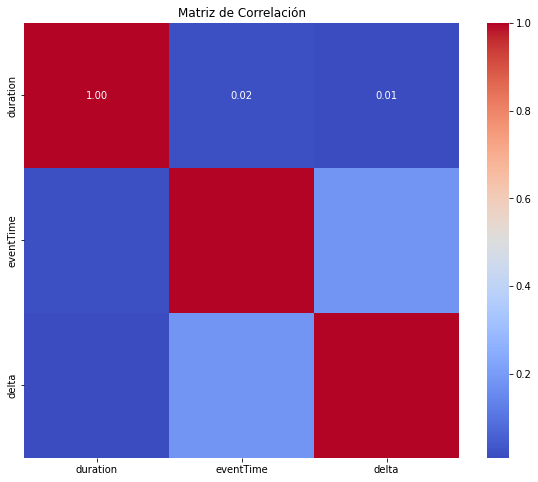

In [195]:
# Antes de hacer el modelo genero la matriz de correlacion a ver si puedo desestimar alguna caracteristica numérica

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Para visualizar la matriz de correlación como un mapa de calor:
plt.figure(figsize=(10, 8))  # Ajusta el tamaño según necesites
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlación")
plt.show()


 Con regresión lineal:

In [196]:
df_filtered = df


# Selección de variables (características y objetivo/target)
X = df_filtered.drop(['delta', 'simulationId', 'items', 'route', 'truck_id', 'destination', 'origin'], axis=1)  # Excluyo las columnas no deseadas y las que procesaremos por separado
y = df_filtered['delta']  # Target, la columna que quiero predecir

# Manejo de variables categóricas con get_dummies -> genera columnas nuevas con 0,1
#X = pd.get_dummies(X, columns=['destination', 'origin'], drop_first=True)

# Divido los conjuntos de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo el modelo -> en este caso regresión porque es un problema de A.Supervisado y quiero predecir un valor y creo que será suficiente para este propósito
model = LinearRegression()

# Entreno el modelo con los datos de entrenamiento que obtuve del split anterior
model.fit(X_train, y_train)

# Predicción con los datos de test (20% del total)
predictions = model.predict(X_test)

# Evalúo los resultados
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {round(mae,2)}")
print(f"RMSE: {round(rmse,2)}")


MAE: 696521.37
RMSE: 1002341.05


Con randomForest:

In [197]:
# Seleccionar características y la variable objetivo
X = df.drop(['delta', 'simulationId', 'items', 'route', 'truck_id'], axis=1)  # Excluyo las columnas no deseadas y las que procesaremos por separado
y = df_filtered['delta']  # Target, la columna que quiero predecir

# Manejo de variables categóricas con get_dummies -> genera columnas nuevas con 0,1
X = pd.get_dummies(X, columns=['destination', 'origin'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de bosque aleatorio
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular métricas de rendimiento
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"MAE: {round(mae,2)}")
print(f"RMSE: {round(rmse,2)}")


MAE: 688685.63
RMSE: 1129292.57


- #### Entregas


Target column: delta

Argumentos: eventTime y eventType

Métricas a usar: MAE y RMSE

In [198]:
print(entregas.shape)
entregas.head()

(8567, 6)


,eventDescription,eventTime,eventType,simulationId,truckId,delta
13021,"Packet 78 to (calle del Poeta Blas de Otero, 2...",872250,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,120630.0
13112,"Packet 79 to (calle del Poeta Blas de Otero, 2...",992820,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,120570.0
13566,"Packet 50 to (calle de Valdecanillas, 59, Madr...",1536120,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
13614,"Packet 51 to (calle de Valdecanillas, 59, Madr...",1596720,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0
13666,"Packet 52 to (calle de Valdecanillas, 59, Madr...",1657320,Truck ended delivering,007f3d08-14a7-4a93-af9e-f0d9cfbcea94,3321FBL,60600.0


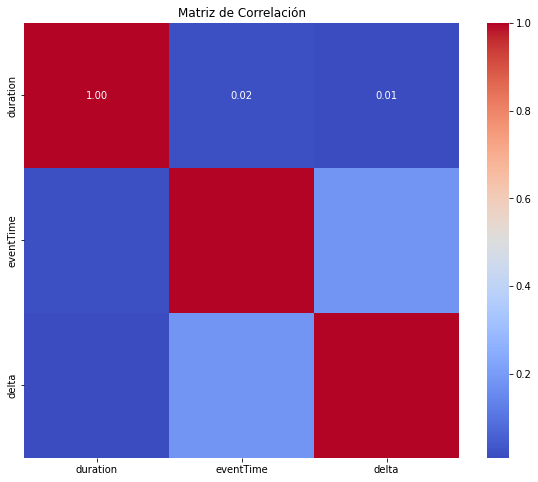

In [199]:
# Antes de hacer el modelo genero la matriz de correlacion a ver si puedo desestimar alguna caracteristica numérica

# Seleccionar solo las columnas numéricas
entregas_numeric = entregas.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Para visualizar la matriz de correlación como un mapa de calor:
plt.figure(figsize=(10, 8))  # Ajusta el tamaño según necesites
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlación")
plt.show()

Con regresión lineal: 

In [200]:

# Caracteristicas y target
X = entregas.drop(['delta', 'simulationId', 'eventDescription',  'truckId'], axis=1)  
y = entregas[['delta']].values

# Manejo de variables categóricas con get_dummies -> genera columnas nuevas con 0,1
X = pd.get_dummies(X, columns=['eventType'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Crear modelo
model = LinearRegression()

#Entrenar 
model.fit(X,y)


# Predecir en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular métricas de rendimiento
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f"MAE: {round(mae,2)}")
print(f"RMSE: {round(rmse,2)}")


MAE: 29953.19
RMSE: 29958.59


Con randomForest:

In [201]:

# Caracteristicas y target
X = entregas.drop(['delta', 'simulationId', 'eventDescription',  'truckId'], axis=1)  
y = entregas[['delta']].values

# Manejo de variables categóricas con get_dummies -> genera columnas nuevas con 0,1
X = pd.get_dummies(X, columns=['eventType'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular métricas de rendimiento
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f"MAE: {round(mae,2)}")
print(f"RMSE: {round(rmse,2)}")



MAE: 31139.73
RMSE: 43127.57
